In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
chrono = pd.read_csv('BB_20190227_chronostrat.csv')
data = pd.read_csv('BB_20190227_RE_data.csv')

In [3]:
chrono.head()

,Well,Period,Top_depth_m,Base_depth_m,Thickness_m,Top_age_Ma,Bottom_age_Ma
0,6406/2-1,QUATERNARY,302.0,1240.0,938.0,0.00,65.00
1,6406/2-1,UPPER PLIOCENE,1240.0,1690.0,450.0,1.64,2.52
2,6406/2-1,LOWER PLIOCENE,1690.0,1720.0,30.0,3.40,4.30
3,6406/2-1,LOWER PLIOCENE,1720.0,1730.0,10.0,3.40,4.30
4,6406/2-1,UPPER MIOCENE,1730.0,1800.0,70.0,5.20,10.40


In [4]:
data.head()

,Well,Depth m RKB,Formation (NPD),Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
0,6406/2-1,2510,SPRINGAR FM,DC,SH/CLYST,356.0,2.20,4.61,2.14,1.15,401,0.32,GEOLABNOR
1,6406/2-1,2520,SPRINGAR FM,DC,SH/CLYST,362.0,1.05,3.00,1.74,1.00,300,0.26,GEOLABNOR
2,6406/2-1,2530,SPRINGAR FM,DC,SH/CLYST,360.0,1.85,4.23,2.54,1.01,419,0.30,GEOLABNOR
3,6406/2-1,2540,SPRINGAR FM,DC,CLYST/SH,360.0,1.34,2.97,1.72,0.80,371,0.31,GEOLABNOR(SAGA)
4,6406/2-1,2540,SPRINGAR FM,DC,SH/CLYST,360.0,1.34,2.97,1.72,0.80,371,0.31,GEOLABNOR


In [5]:
print('Chrono row,columns',chrono.shape)
print('Data row,columns',data.shape)

Chrono row,columns (111, 7)
Data row,columns (303, 13)


In [6]:
chrono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
Well             105 non-null object
Period           105 non-null object
Top_depth_m      105 non-null float64
Base_depth_m     105 non-null float64
Thickness_m      105 non-null float64
Top_age_Ma       105 non-null float64
Bottom_age_Ma    105 non-null float64
dtypes: float64(5), object(2)
memory usage: 6.1+ KB


In [7]:
#Show missing entries
def num_missing(x):
  return sum(x.isnull())

In [8]:
#Applying per column:
print ("Missing values per column:")
print (chrono.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (chrono.apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well             6
Period           6
Top_depth_m      6
Base_depth_m     6
Thickness_m      6
Top_age_Ma       6
Bottom_age_Ma    6
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [9]:
#Applying per column:
print ("Missing values per column:")
print (data.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (data.apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well                    0
Depth m RKB             0
Formation (NPD)         0
Type of measurement     0
samplith                0
tmax                    7
s1                      0
s2                      0
s3                     31
toc                     0
HI                      0
pi                      0
company_name            0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [16]:
chrono.loc[105:]

,Well,Period,Top_depth_m,Base_depth_m,Thickness_m,Top_age_Ma,Bottom_age_Ma
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
chrono.drop(chrono.index[105:], inplace=True)
chrono.tail(20)

,Well,Period,Top_depth_m,Base_depth_m,Thickness_m,Top_age_Ma,Bottom_age_Ma
85,6406/3-1,UPPER PALEOCENE,2320.0,2380.0,60.0,57.2,60.50
86,6406/3-1,LOWER PALEOCENE,2380.0,2410.0,30.0,60.5,65.00
87,6406/3-1,DANIAN,2410.0,2425.0,15.0,60.5,65.00
88,6406/3-1,LOWER MAASTRICHTIAN,2425.0,2440.0,15.0,69.5,78.50
89,6406/3-1,LOWER CAMPANIAN,2440.0,2620.0,180.0,78.5,83.00
90,6406/3-1,UPPER CRETACEOUS,2620.0,3205.0,585.0,65.0,97.00
91,6406/3-1,ALBIAN,3205.0,3648.0,443.0,97.0,112.00
92,6406/3-1,BARREMIAN,3648.0,3662.0,14.0,124.5,131.80
93,6406/3-1,PORTLANDIAN,3662.0,3668.0,6.0,145.6,148.85
94,6406/3-1,OXFORDIAN,3668.0,3686.0,18.0,154.7,157.10


In [19]:
#Applying per column:
print ("Missing values per column:")
print (chrono.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (chrono.apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well             0
Period           0
Top_depth_m      0
Base_depth_m     0
Thickness_m      0
Top_age_Ma       0
Bottom_age_Ma    0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [20]:
chrono['Well'].unique()

array(['6406/2-1', '6406/2-2', '6406/3-1'], dtype=object)

In [21]:
chrono['Well'].nunique()

3

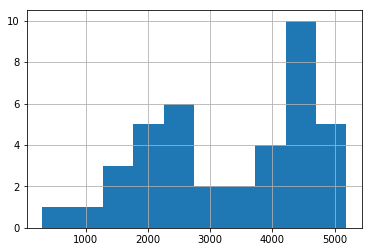

In [26]:
chrono[chrono['Well']=='6406/2-1']['Top_depth_m'].hist()

In [27]:
chrono.head()

,Well,Period,Top_depth_m,Base_depth_m,Thickness_m,Top_age_Ma,Bottom_age_Ma
0,6406/2-1,QUATERNARY,302.0,1240.0,938.0,0.00,65.00
1,6406/2-1,UPPER PLIOCENE,1240.0,1690.0,450.0,1.64,2.52
2,6406/2-1,LOWER PLIOCENE,1690.0,1720.0,30.0,3.40,4.30
3,6406/2-1,LOWER PLIOCENE,1720.0,1730.0,10.0,3.40,4.30
4,6406/2-1,UPPER MIOCENE,1730.0,1800.0,70.0,5.20,10.40


In [38]:
chrono[chrono['Well']=='6406/2-1'][['Top_depth_m', 'Base_depth_m']].head()

,Top_depth_m,Base_depth_m
0,302.0,1240.0
1,1240.0,1690.0
2,1690.0,1720.0
3,1720.0,1730.0
4,1730.0,1800.0


In [44]:
print (chrono[chrono['Well']=='6406/2-1']['Top_depth_m'].min())
print (chrono[chrono['Well']=='6406/2-1']['Top_depth_m'].max())

302.0
5190.0


In [39]:
data.head()

,Well,Depth m RKB,Formation (NPD),Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
0,6406/2-1,2510,SPRINGAR FM,DC,SH/CLYST,356.0,2.20,4.61,2.14,1.15,401,0.32,GEOLABNOR
1,6406/2-1,2520,SPRINGAR FM,DC,SH/CLYST,362.0,1.05,3.00,1.74,1.00,300,0.26,GEOLABNOR
2,6406/2-1,2530,SPRINGAR FM,DC,SH/CLYST,360.0,1.85,4.23,2.54,1.01,419,0.30,GEOLABNOR
3,6406/2-1,2540,SPRINGAR FM,DC,CLYST/SH,360.0,1.34,2.97,1.72,0.80,371,0.31,GEOLABNOR(SAGA)
4,6406/2-1,2540,SPRINGAR FM,DC,SH/CLYST,360.0,1.34,2.97,1.72,0.80,371,0.31,GEOLABNOR


In [51]:
data[data['Well']=='6406/2-1']['Depth m RKB'] < chrono[chrono['Well']=='6406/2-1']['Top_depth_m'].max()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
107    True
108    True
109    True
110    True
111    True
112    True
113    True
114    True
115    True
116    True
117    True
118    True
119    True
120    True
121    True
122    True
123    True
124    True
125    True
126    True
127    True
128    True
129    True
130    True
131    True
132    True
133    True
134    True
135    True
136    True
Name: Depth m RKB, Length: 137, dtype: bool